In [42]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Convert to csv
# Commented out as its already been run
'''
from JSONtoCSV import convert_json_to_csv 
mouse_events_dataframe = convert_json_to_csv('mouse_events.json')
mouse_events_dataframe.head()
'''

"\nfrom JSONtoCSV import convert_json_to_csv \nmouse_events_dataframe = convert_json_to_csv('mouse_events.json')\nmouse_events_dataframe.head()\n"

In [3]:
# Load from csv
df = pd.read_csv('mouse_events.csv')
df = df.rename(columns={'Unnamed: 0' : 'index'})    # Think i can just use pandas built in index?
# TODO 'Normalise' time to be from 0 to end_time in seconds.

print(df.head())
print('Largest x, y: ', df['x'].max(), df['y'].max())
print(len(df['turkId'].unique()), ' Unique turk Ids')

index  button      event_type          target   time      x      y  step  \
0      0       1       mousedown  alloc-slider-1  0.000  477.0  405.0     1   
1      1       1         mouseup  alloc-slider-1  0.111  478.0  405.0     1   
2      2       1           click  alloc-slider-1  0.111  478.0  405.0     1   
3      3       1       mousedown  alloc-slider-1  1.516  479.0  405.0     1   
4      4       1  mousedirchange  alloc-slider-1  2.395  543.0  403.0     1   

           turkId  
0  A35YFAFWP33C70  
1  A35YFAFWP33C70  
2  A35YFAFWP33C70  
3  A35YFAFWP33C70  
4  A35YFAFWP33C70  
Largest x, y:  1879.0 2344.0
461  Unique turk Ids


In [4]:
# Full dataset has over 1 million records, wayyy to much to work with for initial exploration
df_small = df.head(5000) # 'only' first 5,000 records
df_small = df_small[['time', 'x', 'y', 'turkId']]   #Only care about these columns for now
df_small.head()


,time,x,y,turkId
0,0.000,477.0,405.0,A35YFAFWP33C70
1,0.111,478.0,405.0,A35YFAFWP33C70
2,0.111,478.0,405.0,A35YFAFWP33C70
3,1.516,479.0,405.0,A35YFAFWP33C70
4,2.395,543.0,403.0,A35YFAFWP33C70


In [5]:
unique_turks = df_small['turkId'].unique()
type(unique_turks)
unique_turks

array(['A35YFAFWP33C70', 'A33XI8ZN4NZ0SQ', 'A1ZG7VYH0DUEXW',
       'A1RXG8RE0SJ4LC', 'AUDH0P4ZHJKS2', 'A3BGIK3STL9345',
       'A2SDYTC2KXID0I'], dtype=object)

In [6]:
# 'Normalise' time in dataframe
'''
for turk in unique_turks:
        zzz = df_small[ df_small['turkId'] == turk] 

        timezzzdiff = unique_turk_df['time'].iloc[unique_turks.size] - unique_turk_df['time'].iloc[0] 
'''

print(df_small[ df_small['turkId']=='A33XI8ZN4NZ0SQ' ] )
initial_time = df_small['time'][ df_small['turkId']=='A33XI8ZN4NZ0SQ' ].iloc[0]
print(initial_time)
#df.apply(np.sqrt)
test = df_small['time'][ df_small['turkId']=='A33XI8ZN4NZ0SQ' ].add(-initial_time).div(1000)
print(test )

time      x       y          turkId
648    0.000  445.0   426.0  A33XI8ZN4NZ0SQ
649    0.446  511.0   434.0  A33XI8ZN4NZ0SQ
650    1.271  413.0   425.0  A33XI8ZN4NZ0SQ
651    3.070  441.0   430.0  A33XI8ZN4NZ0SQ
652    3.123  444.0   432.0  A33XI8ZN4NZ0SQ
...      ...    ...     ...             ...
1391  83.542  638.0  1197.0  A33XI8ZN4NZ0SQ
1392  83.542  638.0  1197.0  A33XI8ZN4NZ0SQ
1393  83.542  638.0  1197.0  A33XI8ZN4NZ0SQ
1394  83.542  638.0  1197.0  A33XI8ZN4NZ0SQ
1395  83.542  638.0  1197.0  A33XI8ZN4NZ0SQ

[748 rows x 4 columns]
0.0
648     0.000000
649     0.000446
650     0.001271
651     0.003070
652     0.003123
          ...   
1391    0.083542
1392    0.083542
1393    0.083542
1394    0.083542
1395    0.083542
Name: time, Length: 748, dtype: float64


In [7]:
def initilise_time(dataframe):
    '''
    Input  = Pandas Dataframe
    Output = Pandas Dataframe
    Move to JSONtoCSV when completed.
    TODO try and get working without pandas as itll be much faster lol
    '''
    # Step 1 get list of unique turkIds
    unique_Ids = dataframe['turkId'].unique()
    for Id in unique_Ids:
        initial_time = df_small['time'][ df_small['turkId']==Id ].iloc[0]
        print(initial_time)
        df_small['time'] = df_small['time'][ df_small['turkId']==Id ].add(-initial_time).div(1000)

df_small_copy = df_small
initilise_time(df_small_copy)

0.0
nan
nan
nan
nan
nan
nan


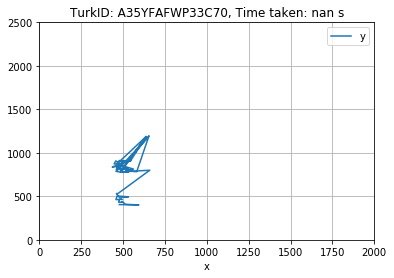

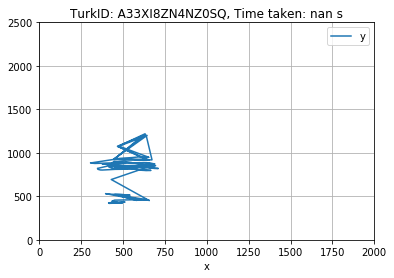

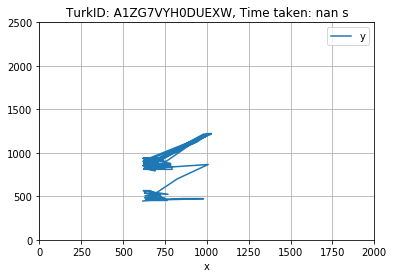

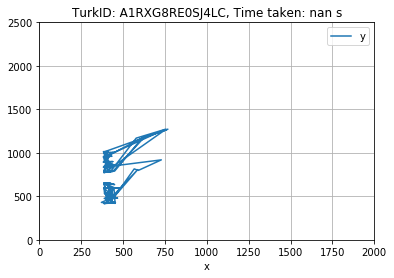

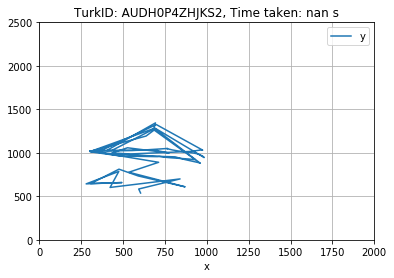

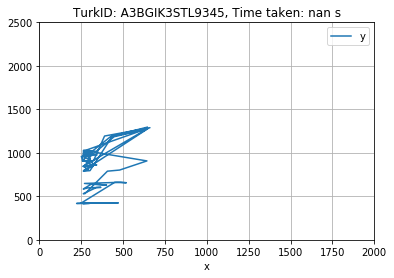

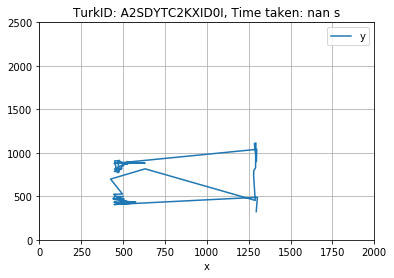

In [8]:
def plot_unique_turks(unique_turks):
    ##Plot values https://datatofish.com/plot-dataframe-pandas/
    for turk in unique_turks:
        unique_turk_df = df_small[ df_small['turkId'] == turk] 

        timediff = unique_turk_df['time'].iloc[unique_turks.size] - unique_turk_df['time'].iloc[0] 

        title_format = 'TurkID: {}, Time taken: {} s'.format(turk, timediff/1000)
        unique_turk_df.plot(kind='line', x ='x', y='y', grid=True, xlim=[0,2000], ylim=[0,2500], title=title_format) # limits match file max


plot_unique_turks(unique_turks)

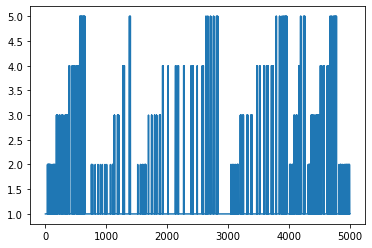

In [20]:
df.head(5000)['step'].plot()

In [29]:

# remove A21Y22J7Q0KSGN because 1,415,605,709,647.55s is too much
# remove AKMURQ1WQN9CX  because 1,415,764,970,154.82s is too much

#new_df = df.drop( df[ df.turkId == "A21Y22J7Q0KSGN"]  )
#new_df = df.query("turkId == A21Y22J7Q0KSGN")

new_df = df[ (df.turkId!='A21Y22J7Q0KSGN') & (df.turkId!='AKMURQ1WQN9CX') ]     #drop these 2 records?
# Successfully dropped!!

max_times_turk = new_df.groupby('turkId').time.max()
print('Average time spent doing tasks: ' +  str(max_times_turk.mean()) + 's' )

Average time spent doing tasks: 332.50458387799534s


In [11]:
# Read in Lab Study Data
df_lab = pd.read_csv('All-Lab-Data-filename.csv')
df_lab.head()

,Unnamed: 0,button,event_type,target,time,x,y,step,turkId,file
0,0,1,mousedown,"[id=""alloc-slider-return-4""]>svg>g>circle",0.000000,397.0,647.0,1,ID1,global_sa_sl_both_2017-02-08 12_48_51.json
1,1,1,mouseup,"[id=""alloc-slider-return-4""]>svg>g>circle",0.547000,423.0,642.0,1,ID1,global_sa_sl_both_2017-02-08 12_48_51.json
2,2,1,click,"[id=""alloc-slider-return-4""]>svg>g>circle",0.547000,423.0,642.0,1,ID1,global_sa_sl_both_2017-02-08 12_48_51.json
3,3,1,mousedown,"[id=""alloc-slider-return-4""]>svg>g>circle",1.176995,426.0,642.0,1,ID1,global_sa_sl_both_2017-02-08 12_48_51.json
4,4,1,mousedirchange,"[id=""alloc-slider-return-4""]>svg>g>circle",1.790000,440.0,640.0,1,ID1,global_sa_sl_both_2017-02-08 12_48_51.json


In [77]:
#

print(df_lab.time.mean())
#df_lab.time.max()

max_times_lab = df_lab.groupby('turkId').time.max()
print('Average time spent doing tasks: ' +  str(max_times_lab.mean()) + 's' )

# We can see that the average time spend doing tasks differs for the lab study (442) and the online turk (332)
# This would match our expectations as we'd think the lab study people pay more attention and spend longer on the task.

353.0121384442896
Average time spent doing tasks: 442.55768000000006s


In [89]:
turk_data = new_df.groupby('turkId').time.max().to_numpy()
lab_data  = df_lab.groupby('turkId').time.max().to_numpy()

all_data = np.append( turk_data, lab_data )

#np.zeros(len(lab_data))
#np.ones(len(turk_data))
labels = np.append( np.ones(len(turk_data)), np.zeros(len(lab_data)) )
labels, len(labels)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 

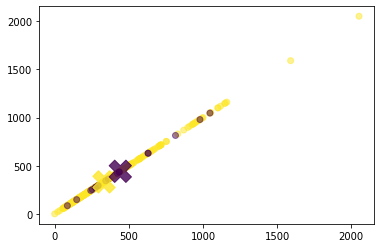

In [93]:
#
plt.scatter(all_data, all_data, c=labels, alpha=0.5)
plt.scatter( ( max_times_turk.mean(),max_times.mean() ), (max_times_turk.mean(),max_times.mean() ), marker='X', c=[1,0], s=500, alpha=0.8 )

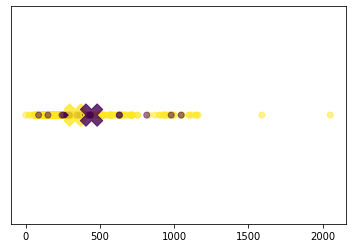

In [105]:
#
plt.scatter(all_data, np.zeros(477), c=labels, alpha=0.5)
plt.scatter( ( max_times_turk.mean(),max_times.mean() ), np.zeros(2), marker='X', c=[1,0], s=500, alpha=0.8 )
plt.yticks([])
plt.show()

In [14]:
#